In [1]:
#导入库
import matplotlib.pyplot as plt
import cv2 as cv
import imutils
print(cv.__file__)

/Users/lixuecheng/miniforge3/lib/python3.9/site-packages/cv2.cpython-39-darwin.so


In [2]:
img=cv.imread('/Users/lixuecheng/Desktop/python/OpenCV/image/人脸.jpeg')
#转换成灰度图
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [3]:
#实例化检测器
face_cas=cv.CascadeClassifier("/Users/lixuecheng/Desktop/python/OpenCV/人脸检测/haarcascade_frontalface_default.xml")
face_cas.load('/Users/lixuecheng/Desktop/python/OpenCV/人脸检测/haarcascade_frontalface_default.xml')

eyes_cas=cv.CascadeClassifier("/Users/lixuecheng/Desktop/python/OpenCV/人脸检测/haarcascade_eye.xml")
eyes_cas.load('/Users/lixuecheng/Desktop/python/OpenCV/人脸检测/haarcascade_eye.xml')

True

In [4]:
#人脸检测
face_rect=face_cas.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=3,minSize=(2,2))

In [5]:
#绘制人脸，检测眼睛
for facerect in face_rect:
    x,y,w,h=facerect
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,255),3)
    
    roi_color=img[y:y+h,x:x+w]
    roi_gray=gray[y:y+h,x:x+w]

    eyes=eyes_cas.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),3)

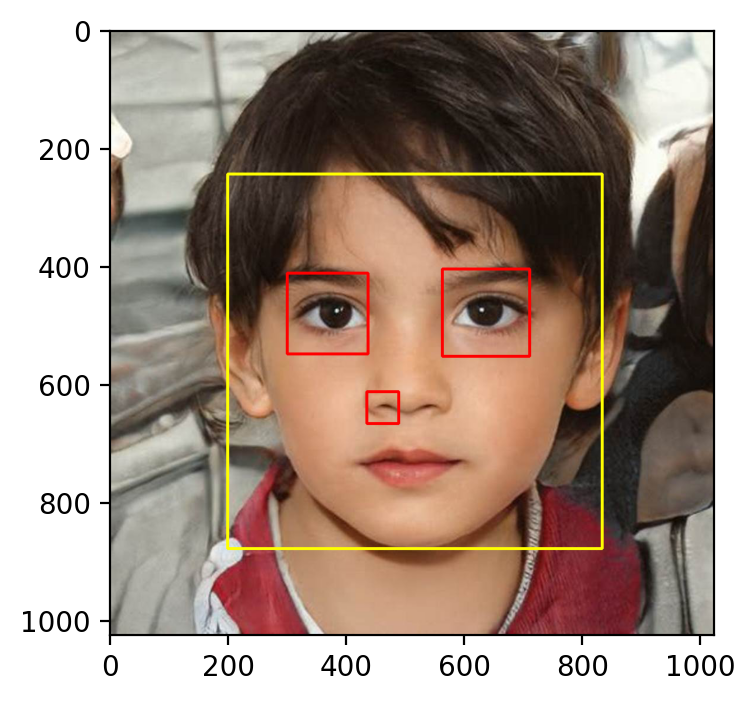

In [6]:
plt.figure(dpi=200)
plt.imshow(imutils.opencv2matplotlib(img))